In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gender-and-diplomatic-representation/gender_diplomacy.csv


In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/kaggle/input/gender-and-diplomatic-representation/gender_diplomacy.csv')

# Display the first few rows of the DataFrame
df.head()


,year,cname_send,main_posting,title,gender,cname_receive,ccode_send,ccodealp_send,ccodeCOW_send,region_send,GME_send,v2lgfemleg_send,FFP_send,ccode_receive,ccodealp_receive,ccodeCOW_receive,region_receive,GME_receive,FFP_receive
0,1968,Afghanistan,1,3,0,China,4,AFG,700,1,1,2.0,0,156,CHN,710,1,0,0
1,1968,Afghanistan,1,3,0,Czechoslovakia,4,AFG,700,1,1,2.0,0,200,CSK,315,3,0,0
2,1968,Afghanistan,1,3,0,Egypt,4,AFG,700,1,1,2.0,0,818,EGY,651,4,1,0
3,1968,Afghanistan,1,3,0,France,4,AFG,700,1,1,2.0,0,250,FRA,220,3,0,0
4,1968,Afghanistan,1,3,0,"Germany, Federal Republic of",4,AFG,700,1,1,2.0,0,280,DEU,260,3,0,0


In [3]:
# Display basic information about the dataset
df.info()

# Check for missing values in the dataset
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94509 entries, 0 to 94508
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              94509 non-null  int64  
 1   cname_send        94509 non-null  object 
 2   main_posting      94509 non-null  int64  
 3   title             94509 non-null  int64  
 4   gender            94509 non-null  int64  
 5   cname_receive     94509 non-null  object 
 6   ccode_send        94509 non-null  int64  
 7   ccodealp_send     94509 non-null  object 
 8   ccodeCOW_send     94509 non-null  int64  
 9   region_send       94509 non-null  int64  
 10  GME_send          94509 non-null  int64  
 11  v2lgfemleg_send   94509 non-null  float64
 12  FFP_send          94509 non-null  int64  
 13  ccode_receive     94509 non-null  int64  
 14  ccodealp_receive  94509 non-null  object 
 15  ccodeCOW_receive  94509 non-null  int64  
 16  region_receive    94509 non-null  int64 

year                0
cname_send          0
main_posting        0
title               0
gender              0
cname_receive       0
ccode_send          0
ccodealp_send       0
ccodeCOW_send       0
region_send         0
GME_send            0
v2lgfemleg_send     0
FFP_send            0
ccode_receive       0
ccodealp_receive    0
ccodeCOW_receive    0
region_receive      0
GME_receive         0
FFP_receive         0
dtype: int64

In [4]:
# Check the unique values in the 'gender', 'title', and 'main_posting' columns
gender_unique_values = df['gender'].unique()
title_unique_values = df['title'].unique()
main_posting_unique_values = df['main_posting'].unique()

gender_unique_values, title_unique_values, main_posting_unique_values


(array([ 0, 99,  1]),
 array([ 3,  1, 99,  2, 96, 97, 98,  0]),
 array([ 1, 99,  0]))

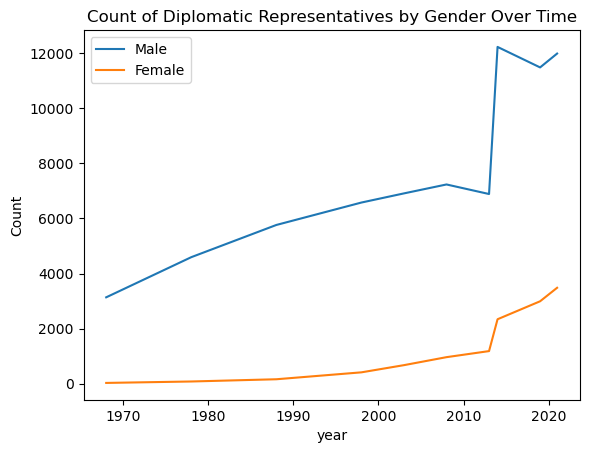

In [5]:
import matplotlib.pyplot as plt

# Create a copy of the DataFrame where gender is not unknown
df_known_gender = df[df['gender'] != 99]

# Group by year and gender, and count the number of rows for each group
gender_counts_by_year = df_known_gender.groupby(['year', 'gender']).size().reset_index(name='count')

# Pivot the DataFrame to have one column for each gender
gender_counts_by_year_pivot = gender_counts_by_year.pivot(index='year', columns='gender', values='count').fillna(0)

# Rename the columns for clarity
gender_counts_by_year_pivot.columns = ['Male', 'Female']

# Plot the counts by year
gender_counts_by_year_pivot.plot(kind='line', title='Count of Diplomatic Representatives by Gender Over Time')
plt.ylabel('Count')
plt.show()


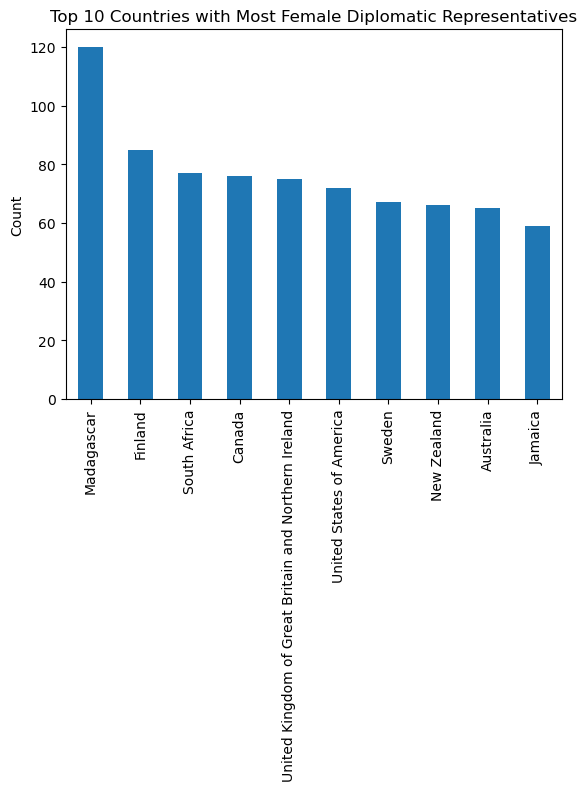

In [6]:
# Get the most recent year in the dataset
most_recent_year = df['year'].max()

# Filter the data for the most recent year and for female representatives
df_recent_year_female = df[(df['year'] == most_recent_year) & (df['gender'] == 1)]

# Group by the sending country and count the number of female representatives
female_counts_by_country = df_recent_year_female['cname_send'].value_counts()

# Get the top 10 countries with the most female representatives
top_countries_female = female_counts_by_country.head(10)

# Create a bar plot
top_countries_female.plot(kind='bar', title='Top 10 Countries with Most Female Diplomatic Representatives')
plt.ylabel('Count')
plt.show()


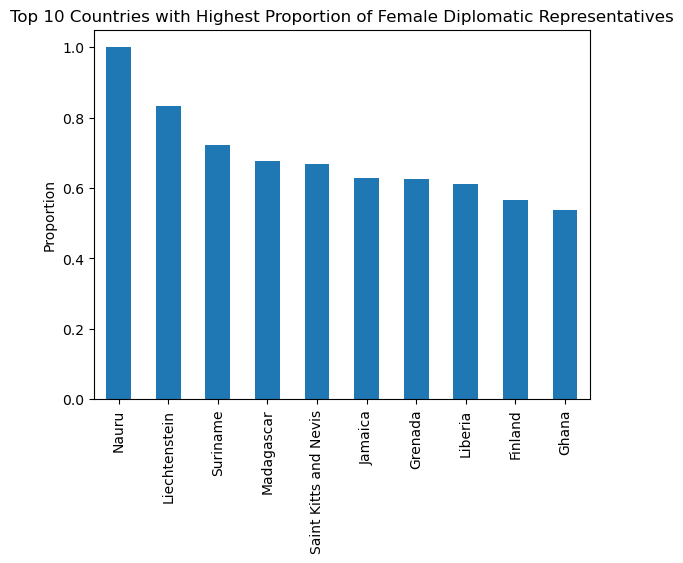

In [7]:
# Filter the data for the most recent year
df_recent_year = df[df['year'] == most_recent_year]

# Group by the sending country and gender, and count the number of records for each group
gender_counts_by_country = df_recent_year.groupby(['cname_send', 'gender']).size()

# Calculate the total number of representatives for each country
total_counts_by_country = df_recent_year['cname_send'].value_counts()

# Calculate the proportion of female representatives for each country
proportion_female_by_country = gender_counts_by_country[:, 1] / total_counts_by_country

# Get the top 10 countries with the highest proportion of female representatives
top_countries_proportion_female = proportion_female_by_country.sort_values(ascending=False).head(10)

# Create a bar plot
top_countries_proportion_female.plot(kind='bar', title='Top 10 Countries with Highest Proportion of Female Diplomatic Representatives')
plt.ylabel('Proportion')
plt.show()


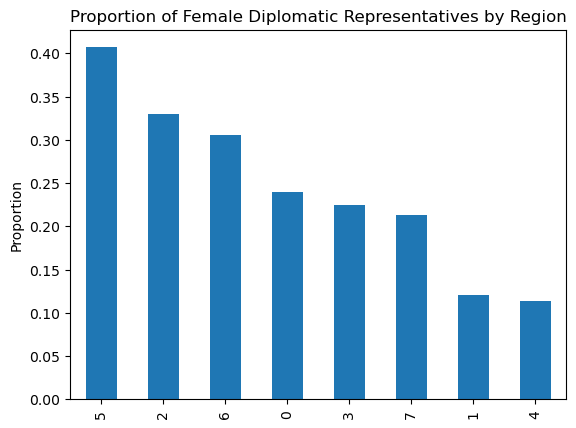

In [8]:
# Group by the sending region and gender, and count the number of records for each group
gender_counts_by_region = df_recent_year.groupby(['region_send', 'gender']).size()

# Calculate the total number of representatives for each region
total_counts_by_region = df_recent_year['region_send'].value_counts()

# Calculate the proportion of female representatives for each region
proportion_female_by_region = gender_counts_by_region[:, 1] / total_counts_by_region

# Sort the regions by the proportion of female representatives
sorted_regions_proportion_female = proportion_female_by_region.sort_values(ascending=False)

# Create a bar plot
sorted_regions_proportion_female.plot(kind='bar', title='Proportion of Female Diplomatic Representatives by Region')
plt.ylabel('Proportion')
plt.show()


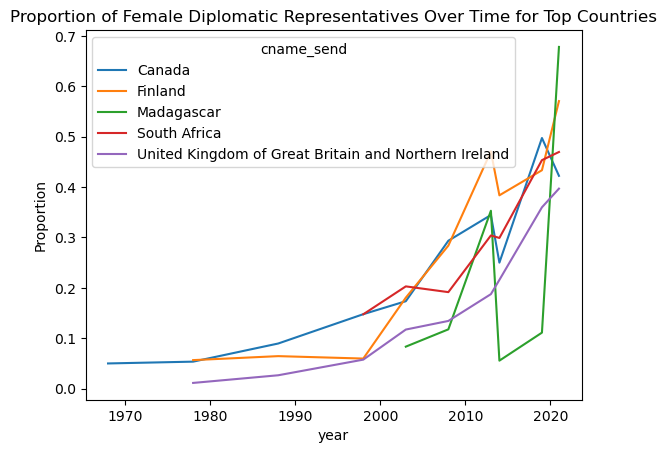

In [9]:
# Get the top 5 countries with the most female representatives
top_countries = top_countries_female.index[:5]

# Filter the data for these countries and for known genders
df_top_countries = df[(df['cname_send'].isin(top_countries)) & (df['gender'] != 99)]

# Group by the year, sending country, and gender, and count the number of records for each group
gender_counts_by_year_country = df_top_countries.groupby(['year', 'cname_send', 'gender']).size()

# Calculate the total number of representatives for each year and country
total_counts_by_year_country = df_top_countries.groupby(['year', 'cname_send']).size()

# Calculate the proportion of female representatives for each year and country
proportion_female_by_year_country = gender_counts_by_year_country[:, :, 1] / total_counts_by_year_country

# Unstack the country level from the index to the columns
proportion_female_by_year_country_unstack = proportion_female_by_year_country.unstack('cname_send')

# Plot the proportions by year for each country
proportion_female_by_year_country_unstack.plot(kind='line', title='Proportion of Female Diplomatic Representatives Over Time for Top Countries')
plt.ylabel('Proportion')
plt.show()


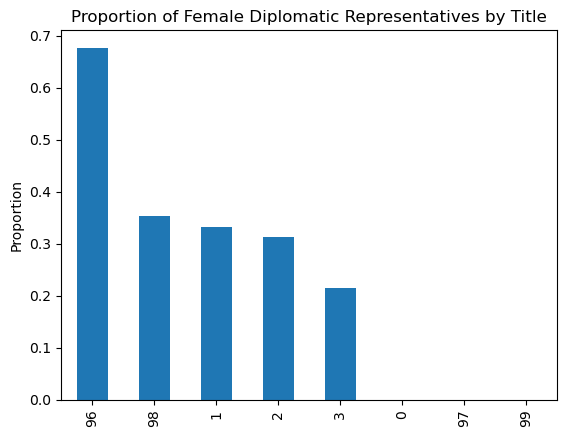

In [10]:
# Group by the title and gender, and count the number of records for each group
gender_counts_by_title = df_recent_year.groupby(['title', 'gender']).size()

# Calculate the total number of representatives for each title
total_counts_by_title = df_recent_year['title'].value_counts()

# Calculate the proportion of female representatives for each title
proportion_female_by_title = gender_counts_by_title[:, 1] / total_counts_by_title

# Sort the titles by the proportion of female representatives
sorted_titles_proportion_female = proportion_female_by_title.sort_values(ascending=False)

# Create a bar plot
sorted_titles_proportion_female.plot(kind='bar', title='Proportion of Female Diplomatic Representatives by Title')
plt.ylabel('Proportion')
plt.show()


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_20/20499042.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


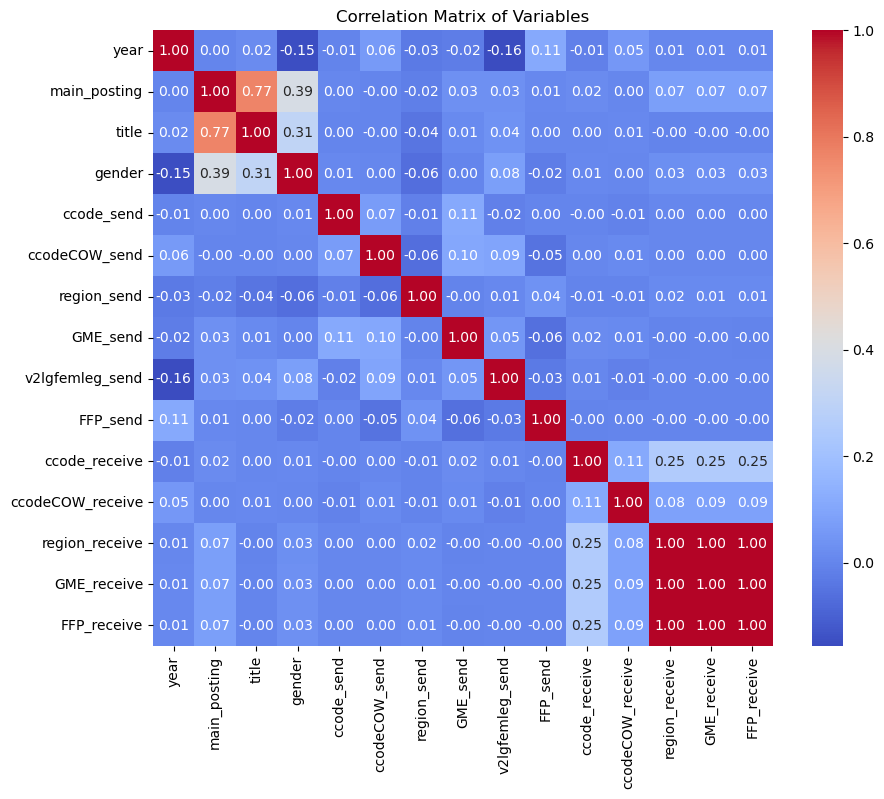

In [11]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Variables')
plt.show()


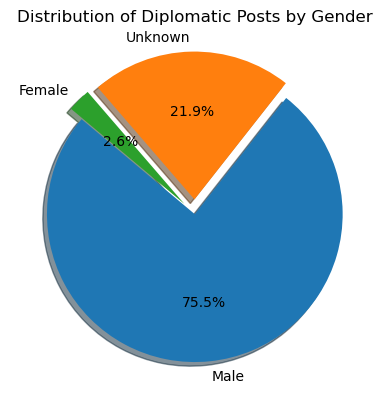

In [12]:
# Count the number of representatives by gender in the most recent year
gender_counts = df_recent_year['gender'].value_counts()

# Rename the index for clarity
gender_counts.index = ['Male', 'Unknown', 'Female']

# Create a pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, explode=(0, 0.1, 0.1), shadow=True)
plt.title('Distribution of Diplomatic Posts by Gender')
plt.ylabel('')
plt.show()


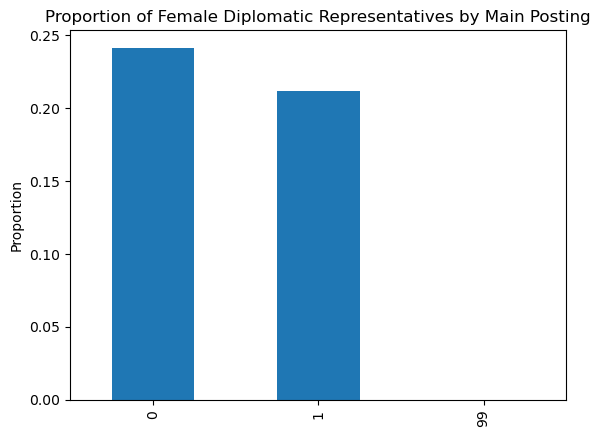

In [13]:
# Group by the main_posting and gender, and count the number of records for each group
gender_counts_by_posting = df_recent_year.groupby(['main_posting', 'gender']).size()

# Calculate the total number of representatives for each main_posting value
total_counts_by_posting = df_recent_year['main_posting'].value_counts()

# Calculate the proportion of female representatives for each main_posting value
proportion_female_by_posting = gender_counts_by_posting[:, 1] / total_counts_by_posting

# Sort the main_posting values by the proportion of female representatives
sorted_posting_proportion_female = proportion_female_by_posting.sort_values(ascending=False)

# Create a bar plot
sorted_posting_proportion_female.plot(kind='bar', title='Proportion of Female Diplomatic Representatives by Main Posting')
plt.ylabel('Proportion')
plt.show()


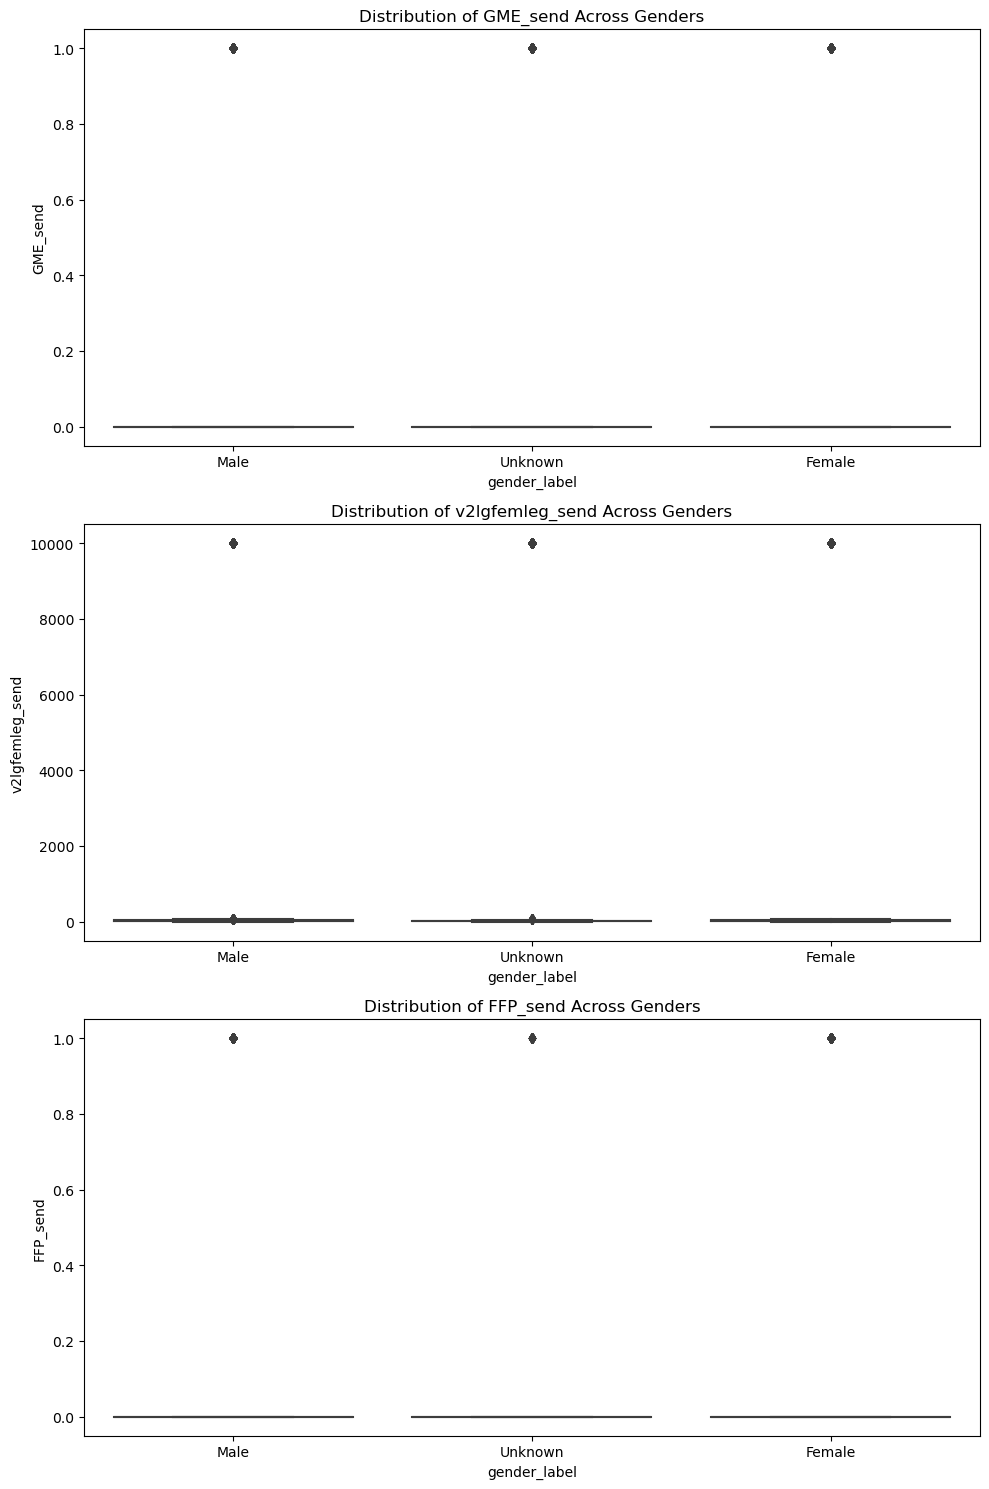

In [14]:
# Create boxplots for the GME_send, v2lgfemleg_send, and FFP_send variables across genders
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Create a mapping from gender codes to labels
gender_mapping = {0: 'Male', 1: 'Female', 99: 'Unknown'}

# Replace the gender codes with labels
df['gender_label'] = df['gender'].map(gender_mapping)

# Create the boxplots
for ax, column in zip(axes, ['GME_send', 'v2lgfemleg_send', 'FFP_send']):
    sns.boxplot(x='gender_label', y=column, data=df, ax=ax)
    ax.set_title(f'Distribution of {column} Across Genders')

plt.tight_layout()
plt.show()


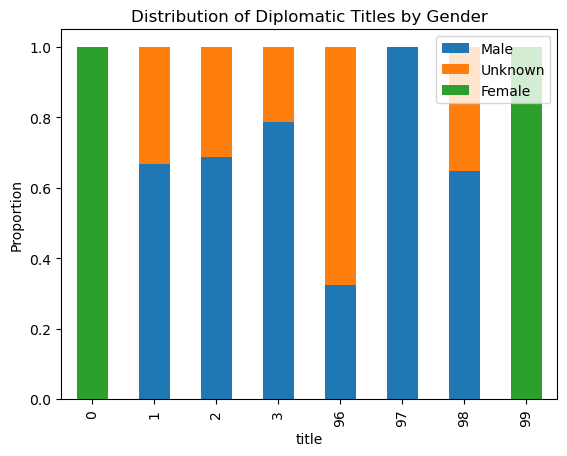

In [15]:
# Calculate the number of representatives for each title and gender
title_counts_by_gender = df_recent_year.groupby(['title', 'gender']).size()

# Calculate the total number of representatives for each title
total_counts_by_title = df_recent_year.groupby('title').size()

# Calculate the proportion of each gender for each title
proportion_by_title_gender = title_counts_by_gender / total_counts_by_title.reindex(title_counts_by_gender.index, level=0)

# Unstack the gender level from the index to the columns
proportion_by_title_gender_unstack = proportion_by_title_gender.unstack('gender')

# Rename the columns for clarity
proportion_by_title_gender_unstack.columns = ['Male', 'Unknown', 'Female']

# Create a stacked bar plot
proportion_by_title_gender_unstack.plot(kind='bar', stacked=True, title='Distribution of Diplomatic Titles by Gender')
plt.ylabel('Proportion')
plt.show()
